## Marketing Campaign for Banking Products

**Highlight** - Building our own Logistic Regression model along with one from sklearn

**Data Description:**



The file bank1.csv contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

**Context:**

The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.

**Attribute Information:**

● ID: Customer ID

● Age: Customer's age in completed years

● Experience: #years of professional experience

● Income: Annual income of the customer ($000)

● ZIP Code: Home Address ZIP code.

● Family: Family size of the customer

● CCAvg: Avg. spending on credit cards per month ($000)

● Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

● Mortgage: Value of house mortgage if any. ($000)

● Personal Loan: Did this customer accept the personal loan offered in the last
campaign?

● Securities Account: Does the customer have a securities account with the bank?

● CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?

● Online: Does the customer use internet banking facilities?

● Credit card: Does the customer use a credit card issued by the bank?



**Objective:**

The classification goal is to predict the likelihood of a liability customer buying personal
loans.

**1.Importing all the libraries**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In C:\Users\MASK\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\MASK\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\MASK\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\MASK\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\MASK\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

**2.Reading the dataset**

In [2]:
data=pd.read_csv("bank1.csv")

**3. Checking the total number of rows and columns**

Our dataset contains 5000 rows and 17 features(columns) and it can be found using data.shape

In [3]:
data.shape

(5000, 14)

**3.Printing the first five rows**

In [4]:
data.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


**4.Printing the last five rows**

In [5]:
data.tail(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


**5.Checking the datatypes**

Let us check the datatype of values present in each column(feature) and make necessary typecastings if any

In [6]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

**6.Identifying the null values**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Conclusion:**

From the above results, It is very clear that none of the columns have null values. Here, null values refer to NaN (Not a Number) and zero will not be included since it's a value

**7.Getting the statistical summary**

These data will give us a good understanding of the distribution of the data. Here, we will find the statistical quantities like Mean, Standard Deviation, Minimum Value, Maximum Value for each column

In [8]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**8.Checking for null values again**

In [9]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**9.Dropping irrelevant columns**

Let's drop ZIP Code and ID columns from the dataset as they will not affect the target variable (Personal Loan)

In [10]:
data.drop(["ZIP Code","ID"],axis=1,inplace=True)

In [11]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


**10.Finding the number of unique values in each column**

In [12]:
unique_values=data.nunique()
unique_values

Age                    45
Experience             47
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

**Inference**

The target variable Personal Loan has only two unique values 0 and 1 which again confirms that this is a binary classification problem.

**11.Plotting the number of unique values in each column**

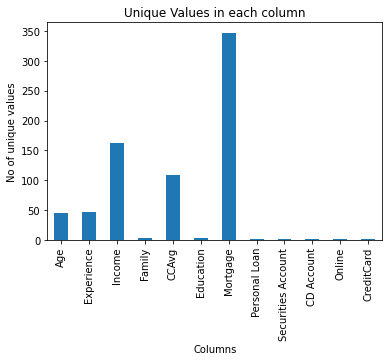

In [13]:
unique_values.plot.bar()
plt.xlabel("Columns")
plt.ylabel("No of unique values")
plt.title("Unique Values in each column")
plt.show()

In [14]:
len(data[data["Mortgage"]==0])

3462

In [15]:
len(data[data["CCAvg"]==0])

106

**12.Printing the value counts of each columns**

In [16]:
for i in data.columns:
    print(i)
    print(data[i].value_counts())

Age
35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64
Experience
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43  

**13.Univariate Analysis**

Finding the distribution of Significant features and plotting them

Text(0.5, 1.0, 'Normal Distribution of Credit Card Use')

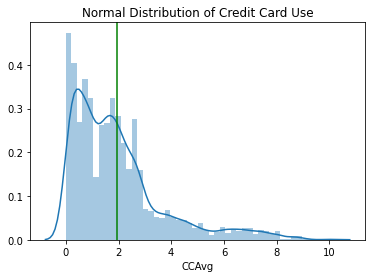

In [17]:
sns.distplot(data["CCAvg"])
plt.axvline(x=np.mean(data["CCAvg"]),c="green") ##plotting the mean line
plt.title("Normal Distribution of Credit Card Use")

**Inference**

The normal distribution of CCAvg is right skewed. 

Text(0.5, 1.0, 'Normal Distribution of Income')

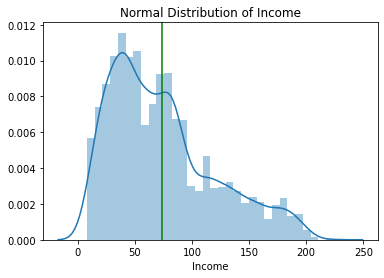

In [18]:
sns.distplot(data["Income"])
plt.axvline(x=np.mean(data["Income"]),c="green") ##plotting the mean line
plt.title("Normal Distribution of Income")

**Inference**

The normal distribution of Income is right skewed. 

Text(0.5, 1.0, 'Normal Distribution of Mortgage')

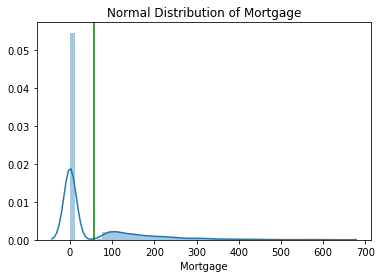

In [19]:
sns.distplot(data["Mortgage"])
plt.axvline(x=np.mean(data["Mortgage"]),c="green") ##plotting the mean line
plt.title("Normal Distribution of Mortgage")

**Inference**

The normal distribution of Mortgage is highly skewed and needs to be standardised 

**14.Creating histograms on each feature**

Analysing the distribution of each feature in a series of historgrams

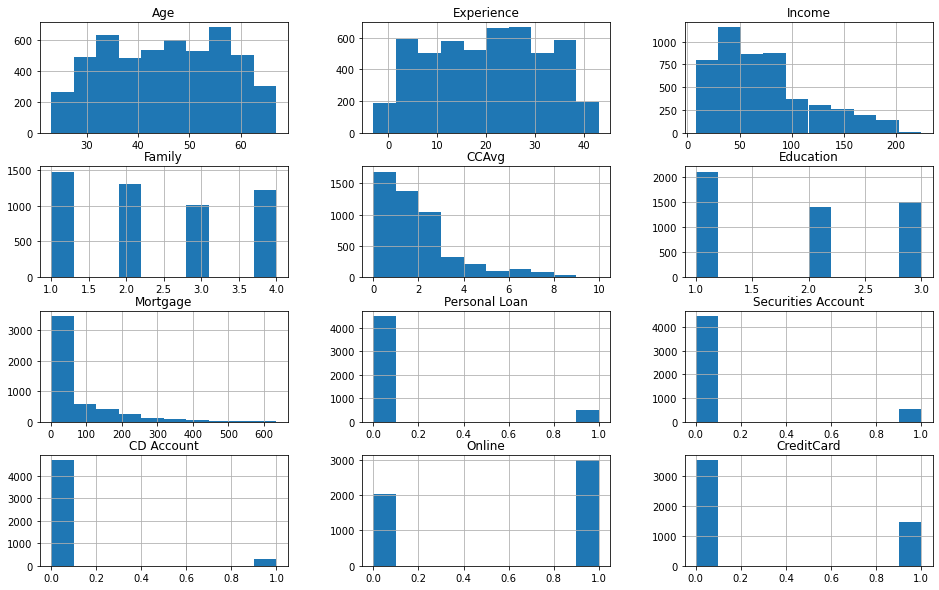

In [20]:
data.hist(figsize=(16,10))
plt.show()

<AxesSubplot:xlabel='Family', ylabel='count'>

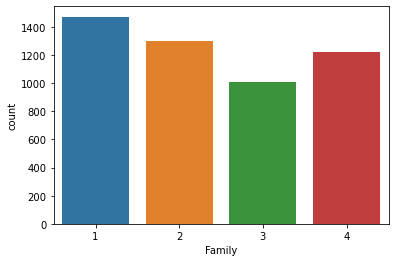

In [21]:
sns.countplot(data["Family"])

**15.Bivariate Analysis**

Let us analyse the correlation, connection and coherence between different variables and try to plot them. In Bivariate Analysis, we are mostly concerned on trying to figure out the relationship between any two variables

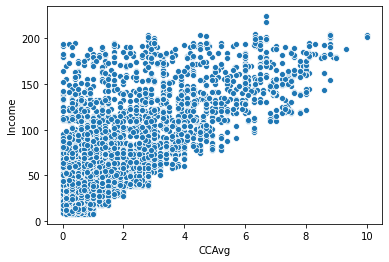

In [22]:
sns.scatterplot(data["CCAvg"],data["Income"])
plt.show()

**Inference**


The relation between two features - Income and CCAvg are plotted and the distribution looks in such a way that most of the Income datapoints lie within lower CCAvg


<AxesSubplot:xlabel='Education', ylabel='Income'>

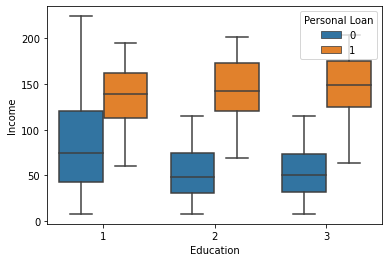

In [23]:
sns.boxplot(x=data["Education"],y=data["Income"],hue=data["Personal Loan"])

### **16.Correlation between the features**

It is very necessary to anaylse the correlation between the features since they provide us an intuitive understanding how each variable is connected with each other.

In [24]:
data.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


**17.Plotting the correlation as a heatmap**

<AxesSubplot:>

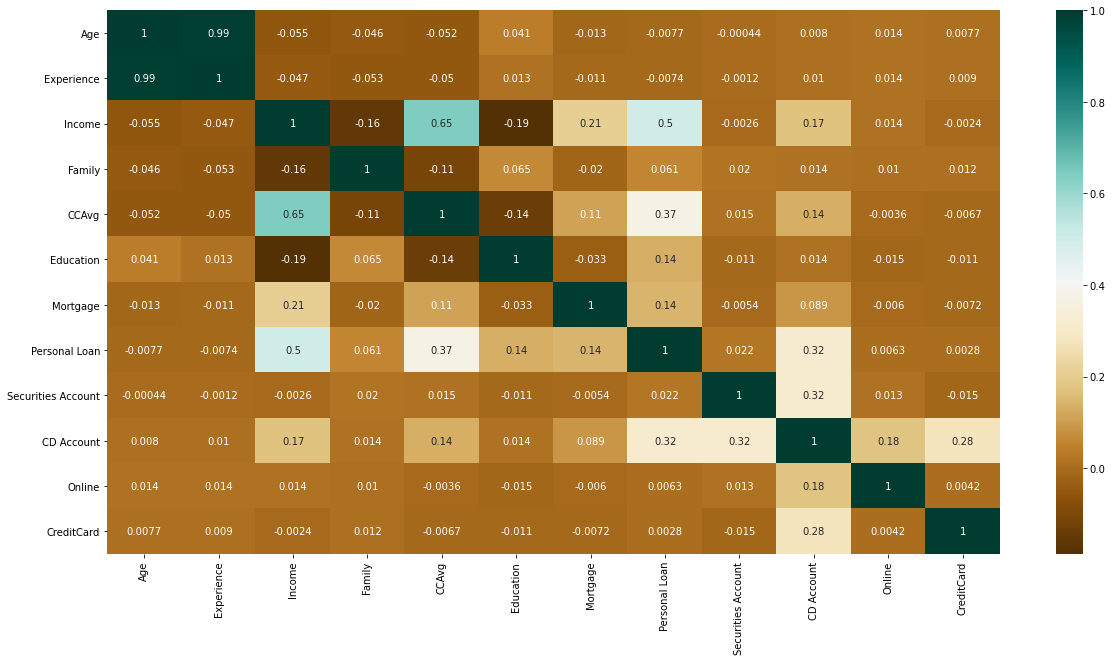

In [25]:
plt.figure(figsize=(20,10))
x=data.corr()
sns.heatmap(x,cmap="BrBG",annot=True)

**18.Correlation of "Personal Loan" with other variables**

By doing this, we can understand the dependancy of our target variable on the features. If there is no/very less correlation between our Personal Loan and any features, we can drop them

In [26]:
corr_out=data.corr()["Personal Loan"]
corr_out

Age                  -0.007726
Experience           -0.007413
Income                0.502462
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

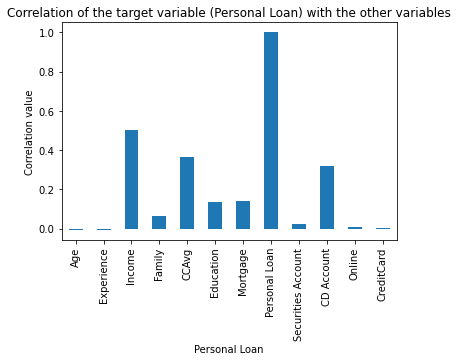

In [27]:
corr_out.plot.bar()
plt.xlabel("Personal Loan")
plt.ylabel("Correlation value")
plt.title("Correlation of the target variable (Personal Loan) with the other variables")
plt.show()

**Inference**

By analysing this plot, we can clearly see that the features [Age, Experience, Securities Account, Online, Credit Card] have no correlation with the target variable. It may decrease the accuracy of our model if we train our model with these irrelevant features. In the next step, we will be dropping them

In [28]:
data=data.drop(["Age","Experience","Securities Account","Online","CreditCard"],axis=1)

In [29]:
data.head(5)

,Income,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account
0,49,4,1.6,1,0,0,0
1,34,3,1.5,1,0,0,0
2,11,1,1.0,1,0,0,0
3,100,1,2.7,2,0,0,0
4,45,4,1.0,2,0,0,0


**19. Applying Necessary Transformations**

[[0.84516008]
 [0.81447799]
 [0.63377716]
 ...
 [0.2535386 ]
 [0.3846447 ]
 [0.54470957]]


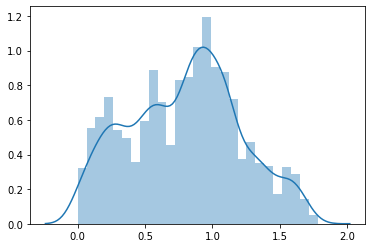

In [30]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(data["CCAvg"].values.reshape(-1,1))
value=pt.transform(data["CCAvg"].values.reshape(-1,1))
sns.distplot(value)
print(value)
data["CCAvg"]=value

In [31]:
data.head()

,Income,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account
0,49,4,0.845160,1,0,0,0
1,34,3,0.814478,1,0,0,0
2,11,1,0.633777,1,0,0,0
3,100,1,1.107427,2,0,0,0
4,45,4,0.633777,2,0,0,0


In [32]:
data["Mortgage"]=pd.cut(data["Mortgage"],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
data.head()

,Income,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account
0,49,4,0.845160,1,0,0,0
1,34,3,0.814478,1,0,0,0
2,11,1,0.633777,1,0,0,0
3,100,1,1.107427,2,0,0,0
4,45,4,0.633777,2,0,0,0


**19.2.Features and Target**

In this step, Let us fix our feature variables and the target variable.

In [33]:
X=data[["Income","Family","CCAvg","Education","Mortgage","CD Account"]].values
y=data["Personal Loan"].values

**20.Splitting the data**

Let us make a 70:30 train,test split 

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

**21.Checking the shape after splitting**

In [36]:
X_train.shape 

(3500, 6)

In [37]:
X_test.shape

(1500, 6)

**Model 1 - Training a Logistic Regression Model (from sklearn)**

Note: Let us name our LR model as Model 1

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model1=LogisticRegression(max_iter=5000)
model1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Getting the test accuracy of the model**



In [40]:
acc1_test=model1.score(X_test,y_test) * 100
acc1_test

94.66666666666667

**Inference**

From getting an accuracy of above 90% on test set, we can conclude that our Logistic Regression model does not overfit the training data and it is not necessary to do regularization as far as this dataset is concerned.

**Training accuracy**

In [41]:
acc1_train=model1.score(X_train,y_train) * 100
acc1_train

94.42857142857143

In [42]:
model1.intercept_

array([-14.34265187])

**Predicting the values**

In [43]:
y_pred=model1.predict(X_test)

**Printing the accuracy and error metrics**

Here, we will print the three different types of metrics for our model 1 known as Mean Absolute Error, Root Mean Squared Error, R2 Score

In [44]:
from sklearn import metrics
MAE1=metrics.mean_absolute_error(y_test, y_pred)
RMS1=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R21=metrics.r2_score(y_test, y_pred)
print('Mean Absolute Error:',MAE1)  
print('Root Mean Squared Error:',RMS1)
print('R2 Score:',R21)

Mean Absolute Error: 0.05333333333333334
Root Mean Squared Error: 0.23094010767585033
R2 Score: 0.3166909620991255


# Building a Logistic Regression Model from Scratch

We have used a Logistic Regression model from sklearn and analysed it. In this section, Let us try to build a Logistic Regression Model from Scratch without using scikit-learn library. Let us try to code the math and the algorithmic workflow behind the concept of Logistic Regression which uses a sigmoid function as an activation function.

### The Logistic Sigmoid Function $\sigma(z)$

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$


This is called Sigmoid function which is going to be the activation function for our Logistic Regression model. In the next cell, Let's define the function

In [45]:
def sigmoid_function(x):
    sigma=1/ (1 + np.exp(-x))
    return sigma

### The Cost Function J($\theta$)


The Cost function will tell us that how much our model goes wrong in predictions. Cost Function quantifies the error between predicted values and expected values. It is very essential to minimize the cost function in order to increase the accuracy of our model. Let us define the cost function using the above function

In [46]:
def cost_function(theta, x, y):
    m = len(y)
    y_pred = sigmoid_function(np.dot(x , theta))
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    cost = -1 / m * sum(error)
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
    return cost[0] , gradient

## Initializing cost and gradient

In [47]:
features=X   ##pass features
results=y  ##pass the target to results (just to not disturb the original values)
mean_scores = np.mean(features, axis=0)
std_scores = np.std(features, axis=0)
features = (features - mean_scores) / std_scores #normalization

rows = features.shape[0]
cols = features.shape[1]

X = np.append(np.ones((rows, 1)), features, axis=1) #include the bias term
y = results.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
cost, gradient = cost_function(theta_init, X, y)

print("Cost value at initialization", cost)
print("Gradient value at initialization:", gradient)

Cost value at initialization 0.6931471805599918
Gradient value at initialization: [[ 0.404     ]
 [-0.14802099]
 [-0.01807819]
 [-0.09427783]
 [-0.04027697]
 [-0.0473914 ]
 [-0.09319536]]


## Gradient Descent

In a nutshell, Minimizing the cost function is called gradient descent.

$\theta_j = \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$

Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. To find a local minimum of a function using gradient descent, we take steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point.

Here $\alpha$ is called as **learning rate**.

In [48]:
def gradient_descent(x, y, theta, alpha, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = cost_function(theta, x, y)
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta, costs

In [49]:
theta, costs = gradient_descent(X, y, theta_init, 1,300)

*Printing the theta value after doing gradient descent*

In [50]:
print("Theta after doing gradient descent:", theta)
print("Resulting cost value:", costs[-1])

Theta after doing gradient descent: [[-4.36491856]
 [ 2.26506145]
 [ 0.71765651]
 [ 0.40068563]
 [ 1.30412187]
 [ 0.05425069]
 [ 0.55883042]]
Resulting cost value: 0.13268221051819323


### Plotting the Convergence of $J(\theta)$

Let us plot the convergence of the cost function on iterating to get the local minimum (Gradient Descent)

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


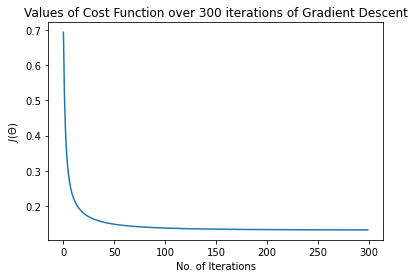

In [51]:
plt.plot(costs)
plt.xlabel("No. of Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over 300 iterations of Gradient Descent")
plt.show()

**Inference**

From the graph, It is very clear that as no. of iterations of gradient descent increases, the cost function gets to minimum (local minimum). With this understanding, we infer that our self-built model is performing well

## Finding the accuracy of our own model


Let us define a function to predict the values and return 

True -> if the value is greater than 0

False -> if the value is lesser than or equal to 0

since we have standardized our values to lie between 0 and 1.

In [52]:
def predict(theta, x):
    results = x.dot(theta)
    return results>0

In [53]:
z = predict(theta, X)
c=0 
for i in z:
    if i:
        c=c+1
print("No of True values in the predicted values: ",c)
d=0
for i in y:
    if i:
        d=d+1
print("No of True values in the actual dataset(Y): ",d)
print("Training Accuracy: ",(c/d)*100)

No of True values in the predicted values:  359
No of True values in the actual dataset(Y):  480
Training Accuracy:  74.79166666666667


Here, we can see that the training accuracy is lower compared to the model from sklearn library. Since the pre-built model involves a lot of hypertuning and regularization parameters which will try to avoid underfitting and overfitting.

### Model 2 - Decision Tree

Let us build a decision tree classifier (scikit-learn) and train it

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [55]:
model2=DecisionTreeClassifier(max_leaf_nodes=10)

In [56]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [57]:
acc2_test=model2.score(X_test,y_test) * 100
acc2_test

98.0

In [58]:
acc2_train=model2.score(X_train,y_train)*100
acc2_train

98.71428571428571

**Inference**

DT Model has got a very high accuracy than LR model

**Predicting the values**

In [59]:
y_pred2=model2.predict(X_test)

In [60]:
MAE2=metrics.mean_absolute_error(y_test, y_pred2)
RMS2=np.sqrt(metrics.mean_squared_error(y_test, y_pred2))
R22=metrics.r2_score(y_test, y_pred2)
print('Mean Absolute Error:',MAE2)  
print('Root Mean Squared Error:',RMS2)
print('R2 Score:',R22)

Mean Absolute Error: 0.02
Root Mean Squared Error: 0.1414213562373095
R2 Score: 0.743759110787172


**Plotting the plot tree**

[Text(132.93529411764706, 195.696, 'X[0] <= 98.5\ngini = 0.181\nsamples = 3500\nvalue = [3148, 352]'),
 Text(39.38823529411765, 152.208, 'X[2] <= 1.153\ngini = 0.017\nsamples = 2611\nvalue = [2589, 22]'),
 Text(19.694117647058825, 108.72, 'gini = 0.0\nsamples = 2462\nvalue = [2462, 0]'),
 Text(59.082352941176474, 108.72, 'X[5] <= 0.5\ngini = 0.252\nsamples = 149\nvalue = [127, 22]'),
 Text(39.38823529411765, 65.232, 'gini = 0.18\nsamples = 140\nvalue = [126, 14]'),
 Text(78.7764705882353, 65.232, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(226.4823529411765, 152.208, 'X[3] <= 1.5\ngini = 0.467\nsamples = 889\nvalue = [559, 330]'),
 Text(157.5529411764706, 108.72, 'X[1] <= 2.5\ngini = 0.193\nsamples = 526\nvalue = [469, 57]'),
 Text(118.16470588235295, 65.232, 'X[0] <= 100.0\ngini = 0.021\nsamples = 462\nvalue = [457, 5]'),
 Text(98.47058823529412, 21.744, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(137.85882352941178, 21.744, 'gini = 0.013\nsamples = 459\nvalue = [456, 

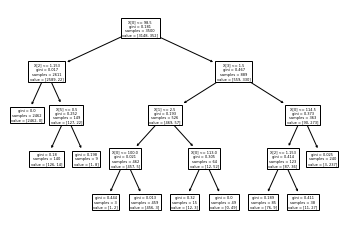

In [61]:
tree.plot_tree(model2.fit(X_train,y_train))

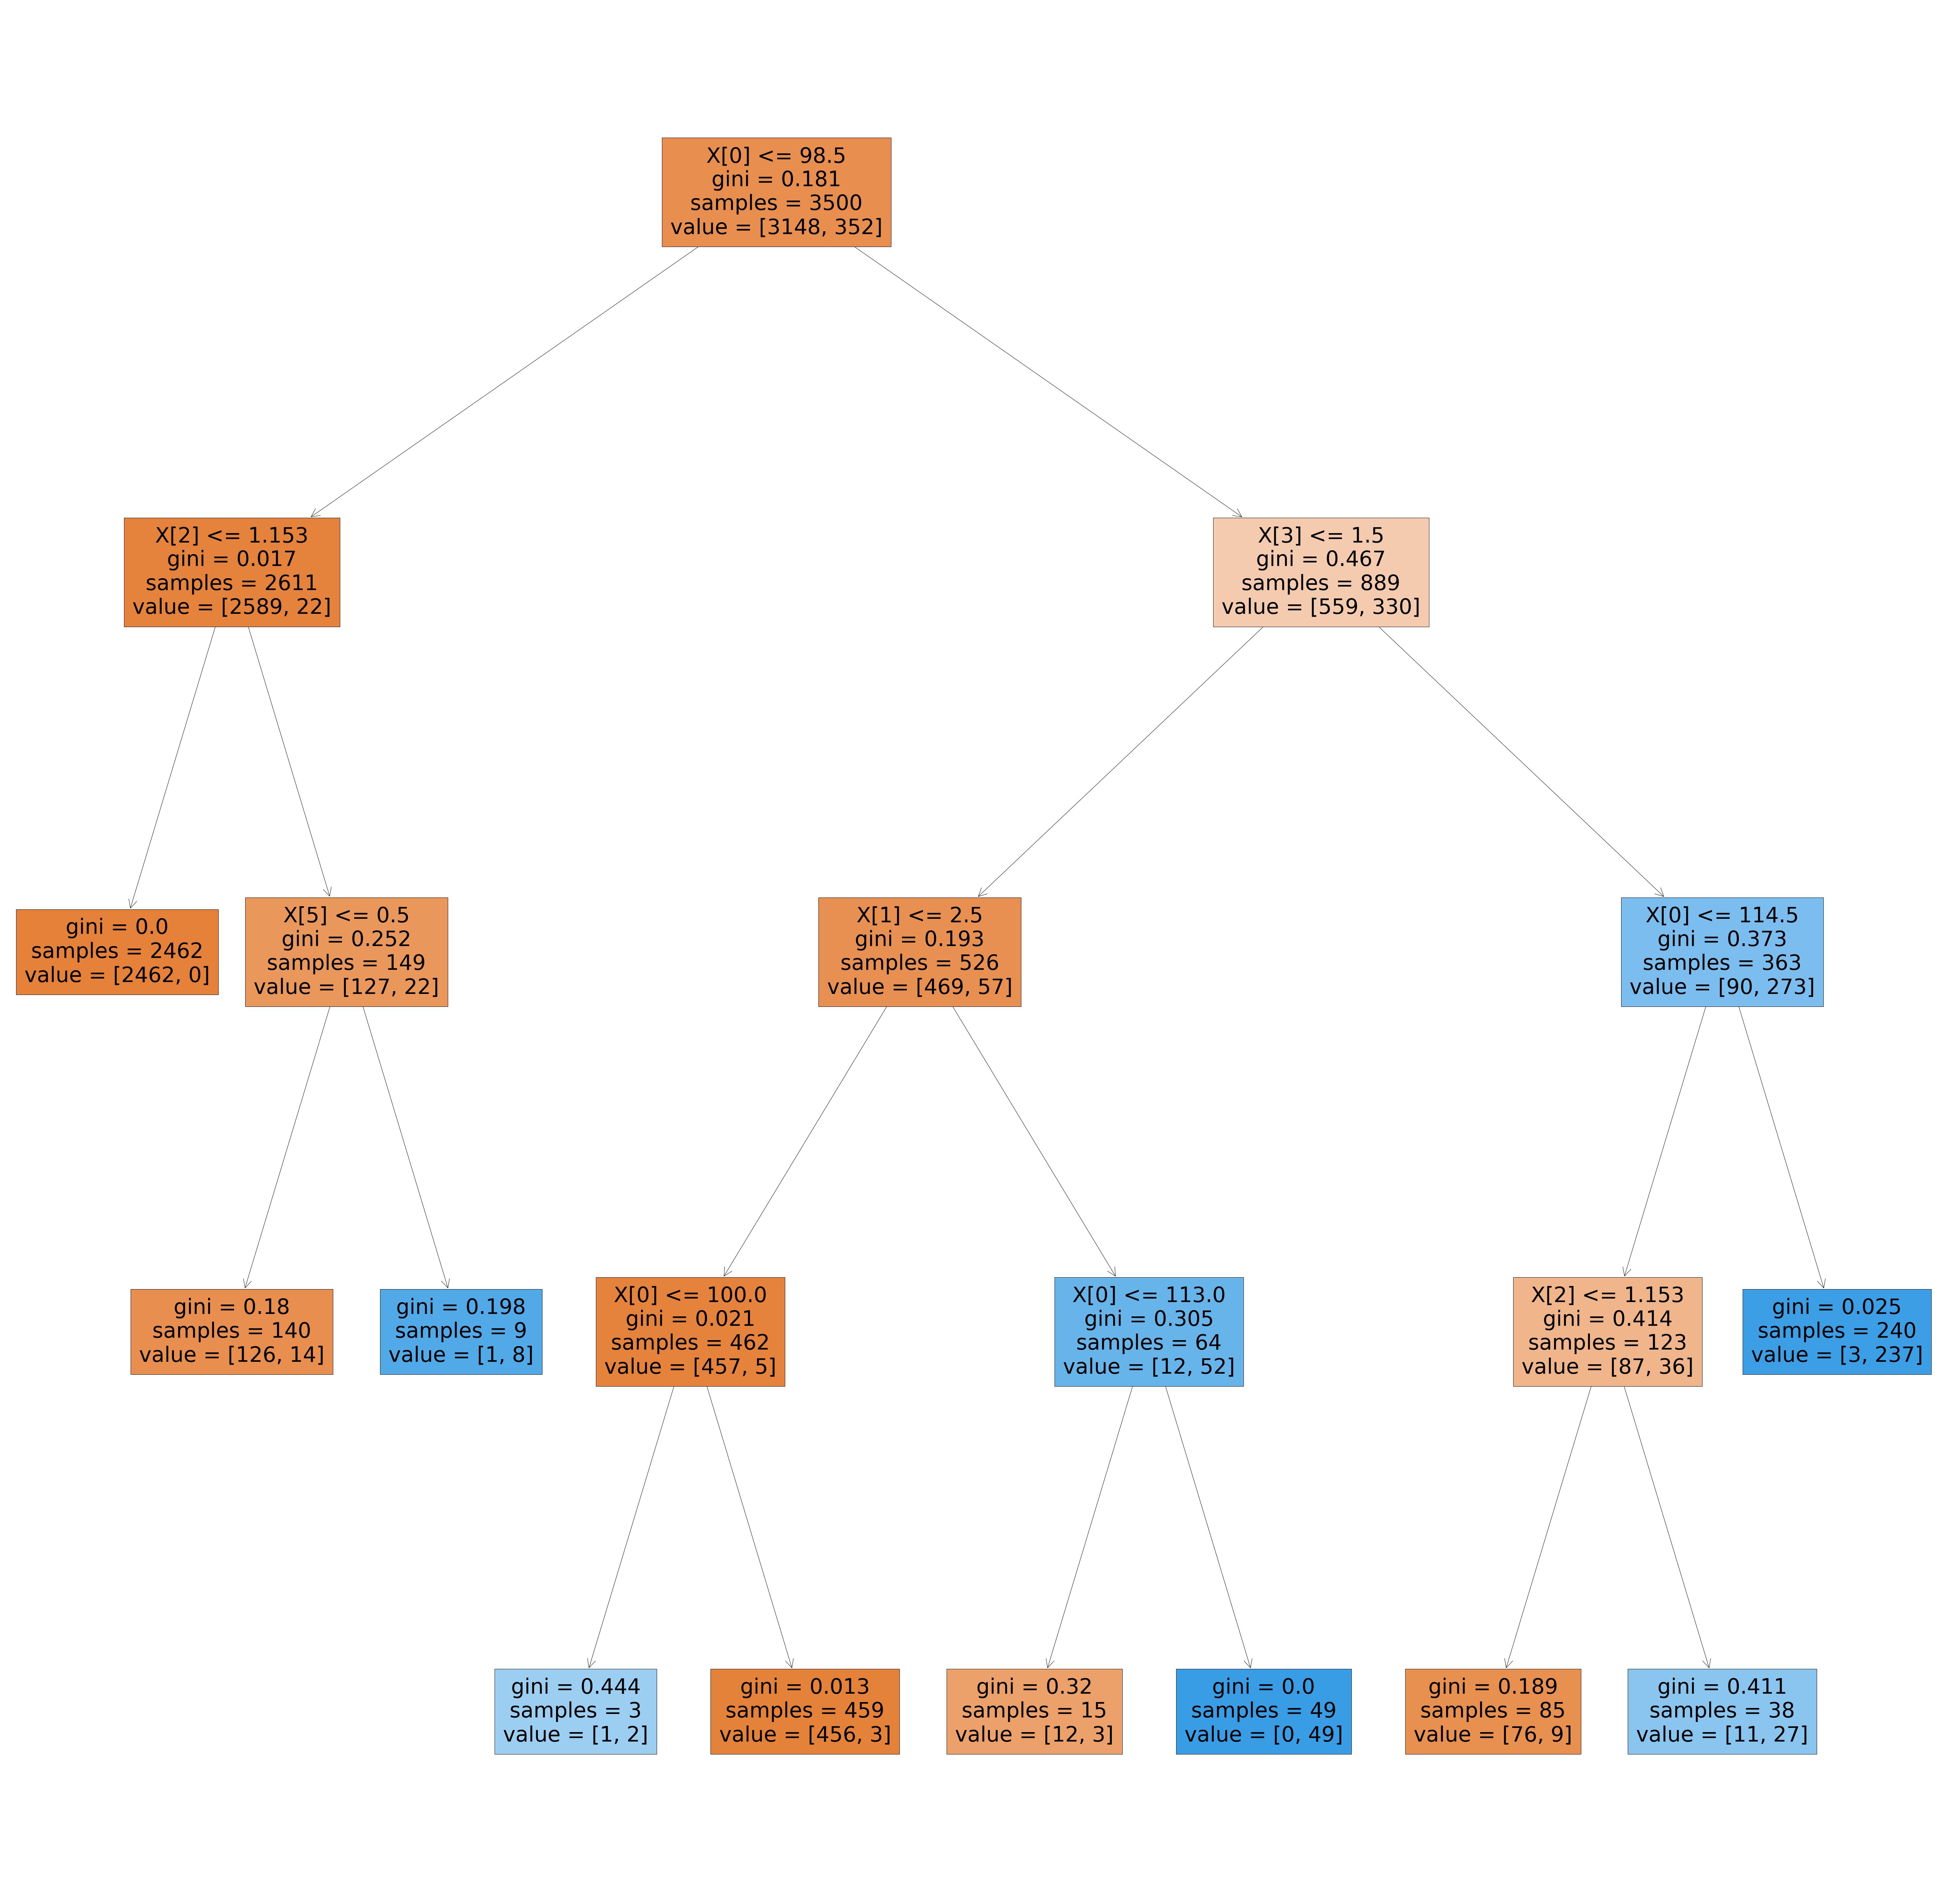

In [62]:
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(model2.fit(X_train,y_train),filled=True)

**Model 3 - Random Forest Classifier**

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
model3=RandomForestClassifier(max_leaf_nodes=10)

In [65]:
model3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=10, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Predicting the values**

In [66]:
acc3_test=model3.score(X_test,y_test) * 100
acc3_test ##testing accuracy

97.6

In [67]:
acc3_train=model3.score(X_train,y_train)*100
acc3_train ##training accuracy

98.17142857142858

In [68]:
y_pred3=model3.predict(X_test)

In [69]:
MAE3=metrics.mean_absolute_error(y_test, y_pred3)
RMS3=np.sqrt(metrics.mean_squared_error(y_test, y_pred3))
R23=metrics.r2_score(y_test, y_pred3)
print('Mean Absolute Error:',MAE3)  
print('Root Mean Squared Error:',RMS3)
print('R2 Score:',R23)

Mean Absolute Error: 0.024
Root Mean Squared Error: 0.15491933384829668
R2 Score: 0.6925109329446064


### Model 4 - Support Vector Classifier

In [70]:
from sklearn.svm import SVC

In [71]:
model4=SVC(gamma="auto")

In [72]:
model4.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
acc4_test=model4.score(X_test,y_test) * 100
acc4_test ##testing accuracy

97.13333333333334

In [74]:
acc4_train=model4.score(X_train,y_train)*100
acc4_train ##training accuracy

97.82857142857144

In [75]:
y_pred4=model4.predict(X_test)##predicting

In [76]:
MAE4=metrics.mean_absolute_error(y_test, y_pred4)
RMS4=np.sqrt(metrics.mean_squared_error(y_test, y_pred4))
R24=metrics.r2_score(y_test, y_pred4)
print('Mean Absolute Error:',MAE4)  
print('Root Mean Squared Error:',RMS4)
print('R2 Score:',R24)

Mean Absolute Error: 0.028666666666666667
Root Mean Squared Error: 0.16931233465600393
R2 Score: 0.6327213921282799


### Model 5 - KNN Classifier

In [77]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [78]:
model5=KNN(2)
##Setting k=2

In [79]:
model5.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [80]:
acc5_test=model5.score(X_test,y_test) * 100
acc5_test ##testing accuracy

96.33333333333334

In [81]:
acc5_train=model5.score(X_train,y_train)*100
acc5_train ##training accuracy

96.97142857142858

In [82]:
y_pred5=model5.predict(X_test)

In [83]:
MAE5=metrics.mean_absolute_error(y_test, y_pred5)
RMS5=np.sqrt(metrics.mean_squared_error(y_test, y_pred5))
R25=metrics.r2_score(y_test, y_pred5)
print('Mean Absolute Error:',MAE5)  
print('Root Mean Squared Error:',RMS5)
print('R2 Score:',R25)

Mean Absolute Error: 0.03666666666666667
Root Mean Squared Error: 0.19148542155126763
R2 Score: 0.5302250364431488


## Analysing the correlation between results

In this step, let us analyse the correlation between the results given by different models

In [84]:
predictions=np.array([y_pred,y_pred2,y_pred3,y_pred4,y_pred5])

In [85]:
predictions

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [86]:
results=pd.DataFrame(predictions,index=["Logistic Regression","Decision Tree","Random Forest","SVC","KNN"]).transpose()

In [87]:
results

,Logistic Regression,Decision Tree,Random Forest,SVC,KNN
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
1495,0,0,0,0,0
1496,0,0,0,0,0
1497,0,0,0,0,0
1498,0,0,0,0,0


In [88]:
results.corr()

,Logistic Regression,Decision Tree,Random Forest,SVC,KNN
Logistic Regression,1.000000,0.645596,0.716149,0.633490,0.626105
Decision Tree,0.645596,1.000000,0.880719,0.836430,0.763767
Random Forest,0.716149,0.880719,1.000000,0.859516,0.795197
SVC,0.633490,0.836430,0.859516,1.000000,0.890285
KNN,0.626105,0.763767,0.795197,0.890285,1.000000


**Inference**

From this correlation dataframe, we can see that the results of most of the models are mostly matching with each other. 


### Comparing the performance of different models and giving a business understanding

In [89]:
testing=np.array([acc1_test,acc2_test,acc3_test,acc4_test,acc5_test])
training=np.array([acc1_train,acc2_train,acc3_train,acc4_train,acc5_train])
combined=np.array([training,testing])
performance=pd.DataFrame(combined,columns=["Logistic Regression","Decision Tree","Random Forest","SVC","KNN"],index=["Training Accuracy","Testing Accuracy"]).transpose()
performance

,Training Accuracy,Testing Accuracy
Logistic Regression,94.428571,94.666667
Decision Tree,98.714286,98.000000
Random Forest,98.171429,97.600000
SVC,97.828571,97.133333
KNN,96.971429,96.333333


**Inference**

1. Training Accuracy and testing accuracy values are closer to each other. So there is no overfitting and underfitting (except LR).
2. All the five models perform well on unseen data

### Comparing the metrics

In [90]:
MAE=[MAE1,MAE2,MAE3,MAE4,MAE5]
RMS=[RMS1,RMS2,RMS3,RMS4,RMS5]
R2=[R21,R22,R23,R24,R25]
Metrics_array=np.array([MAE,RMS,R2])
Metrics=pd.DataFrame(Metrics_array,columns=["Logistic Regression","Decision Tree","Random Forest","SVC","KNN"],index=["MAE","RMS","R2"]).transpose()

In [91]:
Metrics

,MAE,RMS,R2
Logistic Regression,0.053333,0.230940,0.316691
Decision Tree,0.020000,0.141421,0.743759
Random Forest,0.024000,0.154919,0.692511
SVC,0.028667,0.169312,0.632721
KNN,0.036667,0.191485,0.530225


### Plotting the Mean Absolute Error of each model

Text(0, 0.5, 'Mean Absolute Error')

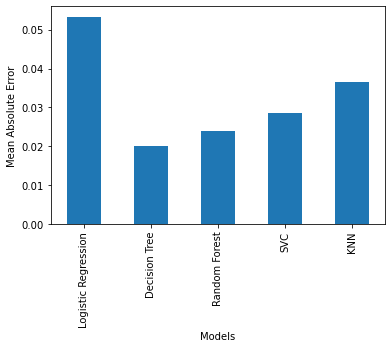

In [92]:
Metrics["MAE"].plot.bar()
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error")

### Plotting the Root Mean Square value of each model

Text(0, 0.5, 'RMS Error')

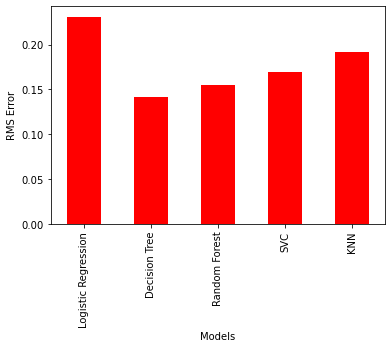

In [93]:
Metrics["RMS"].plot.bar(color="red")
plt.xlabel("Models")
plt.ylabel("RMS Error")

### Plotting the R2 Score of each model

Text(0, 0.5, 'R2 Score')

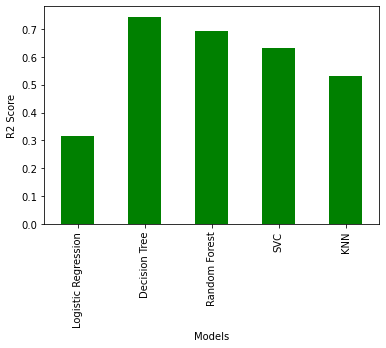

In [94]:
Metrics["R2"].plot.bar(color="green")
plt.xlabel("Models")
plt.ylabel("R2 Score")

### Conclusion and understanding

Various ML models have been created to classify the target variable (Personal Loan). After analysing all the performance metrics, we can come to a conclusion that all the models except Logistric Regression perform well on unseen data. For business purposes, we can use the Random Forest Classifier since it performs in the best manner for this dataset. Standardisation of data was a crucial step here as far as I have anaylsed. We have also build our own Linear Regression model from scratch and we have seen that it performs lower than the scikit-learn model.

Author: Sujithkumar M A